## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn import metrics

# Housing Data Analysis Project Overview

This notebook will analyze data from the King County House Sales dataset. This dataset contains various information on homes in King County. I will use this data in order to create multiple linear regression models with the purpose of determining which features are most relevant in predicting housing prices. I will then examine the models' output and compare and contrast to determine which model is best at predicting housing prices.

## Business Case/Problem

Hypothetical Situation: A King County real estate agency is looking to provide advice to home owners on what factors are most important in determining the value of their home. Using several multiple linear regression models I will examine which independant variables are most useful at predicting the dependant variable of home price. The regression models will help in providing home owners with relevant information regarding the price of their home should they be interested in listing their home with the real estate agency. 

## Data Description
The data used in this project will provide the following information;

>ID - unique identified for a house

>Date - house was sold

>Price - is prediction target

>Bedrooms - number of Bedrooms/House

>Bathrooms - number of bathrooms/bedrooms

>Sqft_livingsquare - footage of the home

>Sqft_lotsquare - footage of the lot

>FloorsTotal - floors (levels) in house

>Waterfront - House which has a view to a waterfront

>View - Has been viewed

>Condition - How good the condition is ( Overall )

>Grade - overall grade given to the housing unit, based on King County grading system

>Sqft_above - square footage of house apart from basement

>Sqft_basement - square footage of the basement

>Yr_built - Built Year

>Yr_renovated - Year when house was renovated

>Zipcode - zip

>Lat - Latitude coordinate

>Long - Longitude coordinate

>Sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

>Sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Data Load

In [2]:
# Load the Kings County housing data for analysis.
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Review remaining columns to see which ones make the most sense to keep.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Features to remove: 
- 'yr_renovated': large number of missing data.
- 'date': likely not relevant to business problem.
- 'id': likely not relevant to business problem.
- 'waterfront': large number of missing data.
- 'view': likely not relevant to business problem.
- 'yr_renovated': likely not relevant to business problem.
- 'lat': likely not relevant to business problem.
- 'long': likely not relevant to business problem.
- 'sqft_living15': already have data on sqft living.
- 'sqft_lot15': already have data on sqft lot.

## Data Cleaning

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
# Function to drop unimportant columns from the dataframe.
def filter_columns(df):
    columns_to_keep = ['price','bedrooms', 
                   'bathrooms', 
                   'sqft_living', 
                   'sqft_lot', 
                   'floors', 
                   'condition',
                  'grade',
                  'sqft_above',
                  'yr_built',
                  'zipcode',
                       'lat',
                       'long'
                  ]
    return df[columns_to_keep]

In [7]:
# Create new dataframe containing only relevant features.
df_filtered = filter_columns(df)

In [8]:
# Review new dataeframe for analysis.
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   condition    21597 non-null  int64  
 7   grade        21597 non-null  int64  
 8   sqft_above   21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
 10  zipcode      21597 non-null  int64  
 11  lat          21597 non-null  float64
 12  long         21597 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 2.1 MB


In [9]:
df_filtered.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1788.596842,1970.999676,98077.951845,47.560093,-122.213982
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,827.759761,29.375234,53.513072,0.138552,0.140724
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000,47.471100,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.571800,-122.231000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000


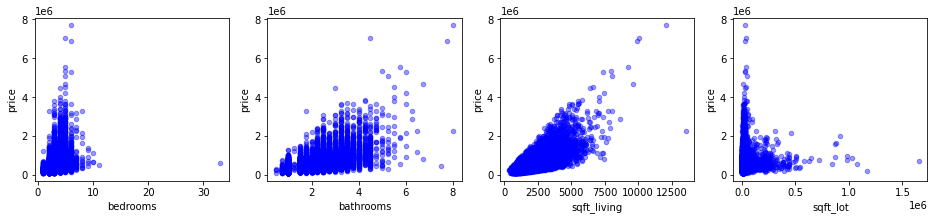

In [10]:
# Create scatter plots to determine the distribution of the features.
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 
                     'bathrooms',
                     'sqft_living',
                     'sqft_lot', 
                     ], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

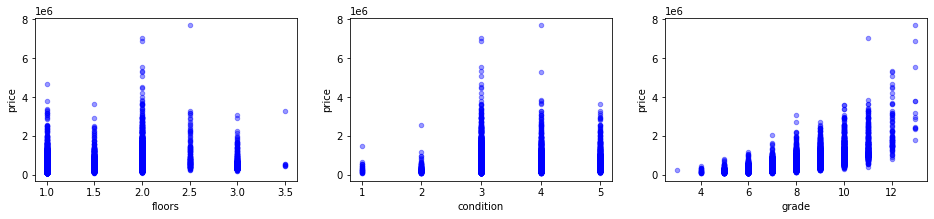

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['floors',
                     'condition',
                     'grade'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

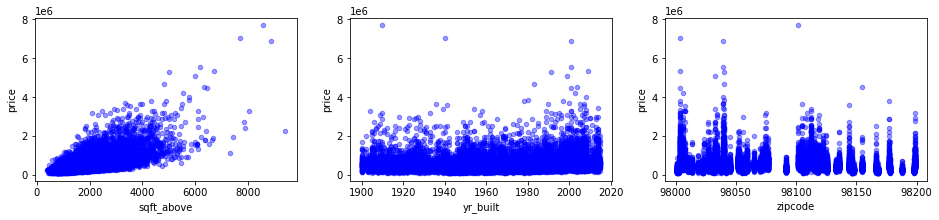

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['sqft_above',
                    'yr_built',
                    'zipcode'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

Looking at the above graphs it appears that 'zipcode', 'floors', and 'condition' could be considered categorical data, which will need to be addressed later. Will likely leave 'grade' as numerical data since it appears that a higher grade equates to a higher home price.

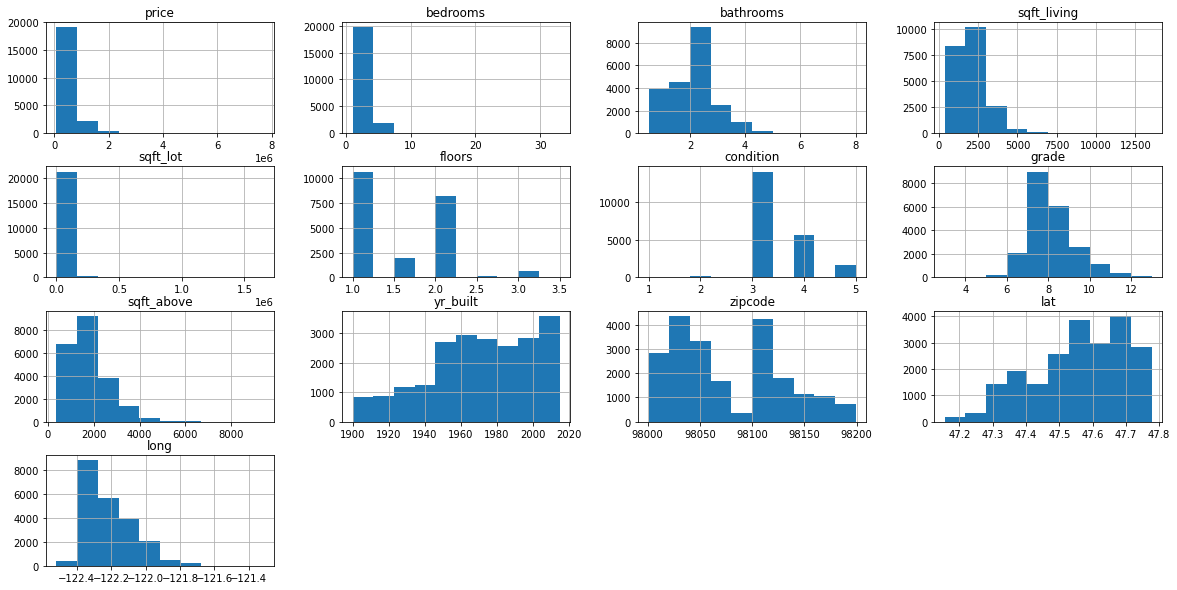

In [13]:
# Create histograms to further analyze the distribution of the features.
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
df_filtered.hist(ax = ax);

Looking at the above graphs it appears that 'price', 'bedrooms', 'bathrooms', sqft_living', 'sqft_lot', and 'sqft_above', and 'yr_built' are not evenly distributed. This is likely due to outliers in the data. Outliers will need to be removed for these and some may need to be log transformed.

### Check for Multicollinearity

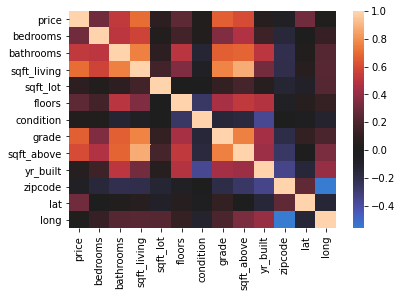

In [14]:
# Created heatmap to determine the multicollinearity of the features. 
sns.heatmap(df_filtered.corr(), center=0);

Noticed that 'sqft_above' and 'sqft_living' are closely related to each other and should not be included together in any models.

# Model A (Simple Model)

Will create a basic model without transforming any features just to get an idea of how the data performs. 

## Feature Engineering

In [15]:
# Model A features:
price_a = df_filtered['price']
bedrooms_a = df_filtered['bedrooms']
bathrooms_a = df_filtered['bathrooms']
sqft_living_a = df_filtered['sqft_living']
grade_a = df_filtered['grade']

In [16]:
# Create dataframe for features.
simple_model_ols = pd.concat([price_a, bedrooms_a, bathrooms_a, sqft_living_a, grade_a], axis=1)
simple_model_ols.head()

,price,bedrooms,bathrooms,sqft_living,grade
0,221900.0,3,1.00,1180,7
1,538000.0,3,2.25,2570,7
2,180000.0,2,1.00,770,6
3,604000.0,4,3.00,1960,7
4,510000.0,3,2.00,1680,8


### Split Data into Training and Test set

In [17]:
# Will seperate data into training and testing sets for analysis.
target_a = simple_model_ols['price']
features_a = simple_model_ols.drop(['price'], axis=1)

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(features_a,target_a,test_size=0.2,random_state=42)
y_test_a

3686     132500.0
10247    415000.0
4037     494000.0
3437     355000.0
19291    606000.0
           ...   
2522     175000.0
11119    394950.0
11973    437000.0
17601    293000.0
19844    293467.0
Name: price, Length: 4320, dtype: float64

## Model A Training

In [18]:
outcome_a = 'y_train_a'
predictors_a = X_train_a
pred_sum_a = '+'.join(predictors_a.columns)
formula_a = outcome_a + '~' + pred_sum_a

In [19]:
data_a = pd.concat([X_train_a,y_train_a], axis=1)
data_a.head()

,bedrooms,bathrooms,sqft_living,grade,price
6243,4,2.00,1440,7,332500.0
8986,3,1.75,1430,7,390000.0
9419,4,2.75,3120,9,800000.0
10155,4,2.50,2060,7,462000.0
10436,3,2.00,2500,7,695000.0


In [20]:
#Create OLS Model to analyze Model A.
model_a_ols = ols(formula=formula_a, data=data_a).fit()
model_a_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              y_train_a   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     5184.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:38:02   Log-Likelihood:            -2.3917e+05
No. Observations:               17277   AIC:                         4.783e+05
Df Residuals:                   17272   BIC:                         4.784e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -4.87e+05    1.7e+04    -28.689      0.000    -5.2e+05   -4.54e+05
bedrooms    -4.335e+04   2685.131    -16.143      0.000   -4.86e+04   -3.81e+04
bathrooms   -2.448e+04   3936.106     -6.219      0.000   -3.22e+04   -1.68e+04
sqft_living   227.8517      4.065     56.054      0.000     219.884     235.819
grade        9.819e+04   2607.614     37.654      0.000    9.31e+04    1.03e+05
==============================================================================
Omnibus:                    12674.639   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           584848.422
Skew:                           3.045   Prob(JB):                         0.00
Kurtosis:                      30.845   Cond. No.                     2.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model A Evaluation

Model A produces p-values of 0 for each feature indicating that there likely is a relationship between the features and the target, which allows us to reject the null hypothesis for these features.  Model A, however, also produces a low R-squared value of .546, indicating that only about 54% of the model's observed variance can be explained by its inputs. Model A also produces a high Skew of 3.045, indicating that the data is not evenly distributed and will need to be transformed. Model A also has a high Kurtosis of 30.845 indicating a heavy tail and the presance of outliers.   

In [21]:
#Create linear regression model using Sklearn.
simple_model = LinearRegression()
simple_model.fit(X_train_a,y_train_a)

LinearRegression()

In [22]:
#Run model on training and testing data.
y_train_pred_a = simple_model.predict(X_train_a)
y_test_pred_a = simple_model.predict(X_test_a)

In [23]:
#Calculate Mean Absolute Error for training and testing data.
print('Train Mean Absolute Error:',metrics.mean_absolute_error(y_train_a, y_train_pred_a))
print('Test Mean Absolute Error:',metrics.mean_absolute_error(y_test_a, y_test_pred_a))

Train Mean Absolute Error: 163322.19664046232
Test Mean Absolute Error: 160590.04935962288


On average Model A predicts home prices within $160,590 of the true value.

In [24]:
#Calculate Mean Squared Error for training and testing data.
print('Train Mean Squared Error:',metrics.mean_squared_error(y_train_a, y_train_pred_a))
print('Test Mean Squared Error:',metrics.mean_squared_error(y_test_a, y_test_pred_a))

Train Mean Squared Error: 61861240256.03002
Test Mean Squared Error: 60591750008.89411


In [25]:
#Calculate Root Mean Squared Error for training and testing data.
print('Train Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_train_a, y_train_pred_a)))
print('Test Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test_a, y_test_pred_a)))

Train Root Mean Squared Error: 248719.1996127963
Test Root Mean Squared Error: 246153.91528247955


In [26]:
#Calculate Model A residuals in order to use for graphs.
resid_a = y_test_pred_a - y_test_a

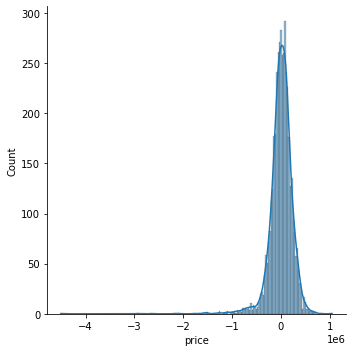

In [27]:
#Create distribution plot to check Model A's distribution of prices.
sns.displot(x=resid_a,kind='hist',kde=True);

Model A's distribution shows a long tail in the lower price range to the left of the median price, likely indicating the prescence of outliers and confirming that the data is not evenly distributed.

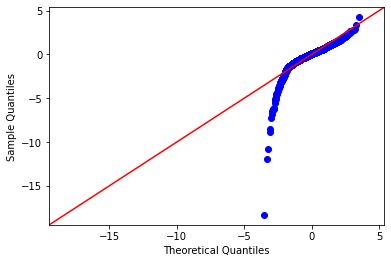

In [28]:
#Create qq plot to further analyze the distribution of the data.
fig = sm.graphics.qqplot(resid_a, dist=stats.norm, line='45',fit=True)

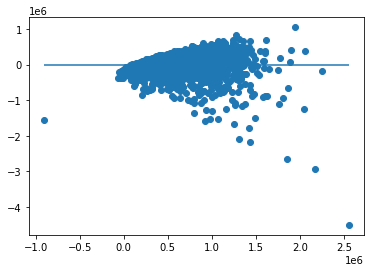

In [29]:
#Create scatter plot to check for homoscedasticity.
plt.scatter(y_test_pred_a, resid_a)
plt.hlines(y=0, xmin=y_test_pred_a.min(), xmax=y_test_pred_a.max())

The data appears to be bunched to the left and appears to be heteroscedastic.

Text(0.5, 1.0, 'Actual vs. Predicted')

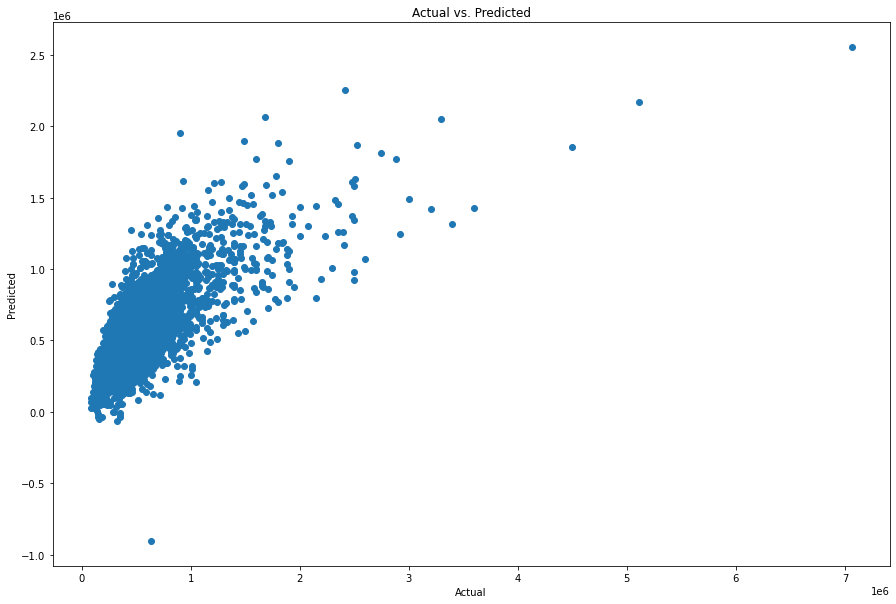

In [30]:
#Create scatter plot to show relationship between actual and predicted data. 
plt.figure(figsize=(15,10))
plt.scatter(y_test_a, y_test_pred_a)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

The actual vs. predicted chart shows that Model A does not appear to follow a strong linear pattern. 

# Model B

## Feature Engineering

### Create Dummy Variables

In [31]:
# Create dummy variables for zipcode data as this would make more sense as a categorical feature.
df_filtered['zipcode'] = df_filtered['zipcode'].astype('str')
df_filtered['yr_built'] = df_filtered['yr_built'].astype('int64')
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   condition    21597 non-null  int64  
 7   grade        21597 non-null  int64  
 8   sqft_above   21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
 10  zipcode      21597 non-null  object 
 11  lat          21597 non-null  float64
 12  long         21597 non-null  float64
dtypes: float64(5), int64(7), object(1)
memory usage: 2.1+ MB


In [32]:
#Create dummy variables and drop first column to avoid dummy variable trap.
zip_dummies = pd.get_dummies(df_filtered['zipcode'], prefix='zip', drop_first=True)

In [33]:
#Drop original zipcode column from the dataframe.
df_dummies = df_filtered.drop(['zipcode'], axis=1)

In [34]:
#Create new dataframe with the dummy variable columns.
df_dummies = pd.concat([df_filtered, zip_dummies], axis=1)
df_dummies.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_dummies.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1788.596842,1970.999676,...,0.013335,0.002639,0.020651,0.011761,0.012455,0.011807,0.012131,0.006297,0.012965,0.014678
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,827.759761,29.375234,...,0.114708,0.051307,0.142216,0.107811,0.110909,0.108020,0.109475,0.079106,0.113125,0.120263
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,370.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,1951.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,1975.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,2210.000000,1997.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model B Training

In [36]:
#Create Model B features, which will be scaled in order to be able to compare between eachother more easily.
price_b = df_dummies['price']
bedrooms_b = df_dummies['bedrooms']
scaled_bed_b = (bedrooms_b-np.mean(bedrooms_b))/np.sqrt(np.var(bedrooms_b))
bathrooms_b = df_dummies['bathrooms']
scaled_bath_b = (bathrooms_b-np.mean(bathrooms_b))/np.sqrt(np.var(bathrooms_b))
#Log transform 'sqft_living' in order to make it more evenly distributed.
logsqft = np.log(df_filtered['sqft_living'])
scaled_sqft = (logsqft-np.mean(logsqft))/np.sqrt(np.var(logsqft))
zip_dummies
yr_b = df_dummies['yr_built']
scaled_yr_b = (yr_b-np.mean(yr_b))/np.sqrt(np.var(yr_b))

In [37]:
model_b = pd.concat([price_b, scaled_bed_b, scaled_bath_b, scaled_sqft, zip_dummies, scaled_yr_b], axis=1)
model_b.head()

,price,bedrooms,bathrooms,sqft_living,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,...,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,yr_built
0,221900.0,-0.402903,-1.451073,-1.125582,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,-0.544678
1,538000.0,-0.402903,0.174486,0.709463,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.680850
2,180000.0,-1.482493,-1.451073,-2.131943,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.293626
3,604000.0,0.676687,1.149821,0.070676,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.204247
4,510000.0,-0.402903,-0.150626,-0.292732,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.544700


### Split Data into Training and Test Set

In [38]:
#Split data into training and testing sets for analysis.
target_b = model_b['price']
features_b = model_b.drop(['price'], axis=1)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(features_b,target_b,test_size=0.2,random_state=42)
X_train_b.head()

,bedrooms,bathrooms,sqft_living,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,...,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,yr_built
6243,0.676687,-0.150626,-0.656140,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.034054
8986,-0.402903,-0.475738,-0.672568,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.306399
9419,0.676687,0.824709,1.166643,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.327691
10155,0.676687,0.499597,0.187988,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.102140
10436,-0.402903,-0.150626,0.644360,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.668099


In [39]:
outcome_b = 'y_train_b'
predictors_b = X_train_b
pred_sum_b = '+'.join(predictors_b.columns)
formula_b = outcome_b + '~' + pred_sum_b

In [40]:
data_b = pd.concat([X_train_b,y_train_b], axis=1)
data_b.head()

,bedrooms,bathrooms,sqft_living,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,...,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,yr_built,price
6243,0.676687,-0.150626,-0.656140,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.034054,332500.0
8986,-0.402903,-0.475738,-0.672568,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.306399,390000.0
9419,0.676687,0.824709,1.166643,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.327691,800000.0
10155,0.676687,0.499597,0.187988,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.102140,462000.0
10436,-0.402903,-0.150626,0.644360,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.668099,695000.0


In [41]:
#Create Model B OLS model. 
model_b_ols = ols(formula=formula_b, data=data_b).fit()
model_b_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              y_train_b   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     474.4
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:38:05   Log-Likelihood:            -2.3645e+05
No. Observations:               17277   AIC:                         4.730e+05
Df Residuals:                   17203   BIC:                         4.736e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.243e+05   1.27e+04     25.543      0.000    2.99e+05    3.49e+05
bedrooms    -4.388e+04   2227.983    -19.693      0.000   -4.82e+04   -3.95e+04
bathrooms    7.273e+04   2869.427     25.345      0.000    6.71e+04    7.84e+04
sqft_living  1.822e+05   2928.076     62.233      0.000    1.76e+05    1.88e+05
zip_98002    1.841e+04   2.15e+04      0.857      0.392   -2.37e+04    6.05e+04
zip_98003    1.226e+04   1.91e+04      0.640      0.522   -2.53e+04    4.98e+04
zip_98004    8.406e+05   1.86e+04     45.187      0.000    8.04e+05    8.77e+05
zip_98005      3.7e+05   2.23e+04     16.595      0.000    3.26e+05    4.14e+05
zip_98006     3.71e+05   1.68e+04     22.115      0.000    3.38e+05    4.04e+05
zip_98007    2.711e+05   2.37e+04     11.423      0.000    2.25e+05    3.18e+05
zip_98008    3.186e+05   1.89e+04     16.835      0.000    2.82e+05    3.56e+05
zip_98010     1.13e+05   2.65e+04      4.268      0.000    6.11e+04    1.65e+05
zip_98011    1.211e+05   2.14e+04      5.650      0.000    7.91e+04    1.63e+05
zip_98014    1.305e+05   2.42e+04      5.394      0.000    8.31e+04    1.78e+05
zip_98019    7.922e+04   2.15e+04      3.679      0.000     3.7e+04    1.21e+05
zip_98022    5.257e+04   2.02e+04      2.608      0.009    1.31e+04    9.21e+04
zip_98023   -8155.1632   1.64e+04     -0.496      0.620   -4.04e+04    2.41e+04
zip_98024    2.205e+05   2.85e+04      7.748      0.000    1.65e+05    2.76e+05
zip_98027    2.014e+05   1.71e+04     11.753      0.000    1.68e+05    2.35e+05
zip_98028    1.207e+05   1.91e+04      6.331      0.000    8.33e+04    1.58e+05
zip_98029    2.291e+05   1.85e+04     12.399      0.000    1.93e+05    2.65e+05
zip_98030   -3267.1419   1.97e+04     -0.166      0.869    -4.2e+04    3.54e+04
zip_98031    5182.1303   1.91e+04      0.272      0.786   -3.22e+04    4.25e+04
zip_98032    2.485e+04   2.48e+04      1.002      0.316   -2.38e+04    7.35e+04
zip_98033     4.13e+05   1.72e+04     23.944      0.000    3.79e+05    4.47e+05
zip_98034    2.237e+05   1.61e+04     13.868      0.000    1.92e+05    2.55e+05
zip_98038    1.955e+04   1.61e+04      1.213      0.225    -1.2e+04    5.11e+04
zip_98039    1.575e+06   3.47e+04     45.333      0.000    1.51e+06    1.64e+06
zip_98040    6.805e+05   1.92e+04     35.469      0.000    6.43e+05    7.18e+05
zip_98042    2.472e+04   1.63e+04      1.519      0.129   -7176.123    5.66e+04
zip_98045    1.304e+05      2e+04      6.515      0.000    9.12e+04     1.7e+05
zip_98052    2.527e+05   1.61e+04     15.680      0.000    2.21e+05    2.84e+05
zip_98053    2.512e+05   1.76e+04     14.272      0.000    2.17e+05    2.86e+05
zip_98055    3.973e+04    1.9e+04      2.086      0.037    2389.012    7.71e+04
zip_98056     1.26e+05   1.73e+04      7.261      0.000     9.2e+04     1.6e+05
zip_98058    4.219e+04    1.7e+04      2.48

## Model B Evaluation

While Model B produces a better R-squared value of .668 than Model A there are also high p-values for some of zip code dummy variables, meaning that these high p-values are insignificant for the model and will need to be removed. Model B also produces a higher Skew than Model A at 4.983, indicating that the data is less evenly distributed and will need to be transformed. Model B also has a much higher Kurtosis of 69.100 indicating more outliers than Model A, this is likely due to the high p-value dummy variables that will need to removed.

In [42]:
#Create linear regression model using Sklearn.
model_b_lr = LinearRegression()
model_b_lr.fit(X_train_b,y_train_b)

LinearRegression()

In [43]:
#Run model on training and testing data.
y_train_pred_b = model_b_lr.predict(X_train_b)
y_test_pred_b = model_b_lr.predict(X_test_b)

In [44]:
#Calculate Mean Absolute Error for training and testing data.
print('Train Mean Absolute Error:',metrics.mean_absolute_error(y_train_b, y_train_pred_b))
print('Test Mean Absolute Error:',metrics.mean_absolute_error(y_test_b, y_test_pred_b))

Train Mean Absolute Error: 124110.04808091969
Test Mean Absolute Error: 122502.0541833247


On average Model B predicts home prices within $122,502 of the true home value.

In [45]:
#Calculate Mean Squared Error for training and testing data.
print('Train Mean Squared Error:',metrics.mean_squared_error(y_train_b, y_train_pred_b))
print('Test Mean Squared Error:',metrics.mean_squared_error(y_test_b, y_test_pred_b))

Train Mean Squared Error: 45177935020.778595
Test Mean Squared Error: 46626531192.452705


In [46]:
#Calculate Root Mean Squared Error for training and testing data.
print('Train Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_train_b, y_train_pred_b)))
print('Test Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test_b, y_test_pred_b)))

Train Root Mean Squared Error: 212551.01745411288
Test Root Mean Squared Error: 215931.7743928686


In [47]:
#Calculate Model B residuals in order to use for graphs.
resid_b = y_test_pred_b - y_test_b

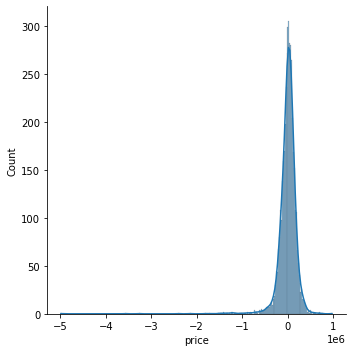

In [48]:
#Create distribution plot to check Model B's distribution of prices.
sns.displot(x=resid_b,kind='hist',kde=True);

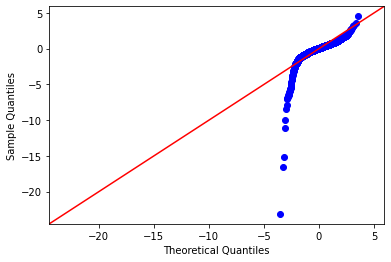

In [49]:
#Create qq plot to further analyze the distribution of the data.
fig = sm.graphics.qqplot(resid_b, dist=stats.norm, line='45',fit=True)

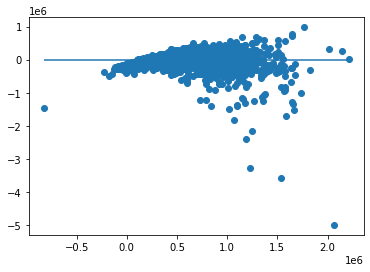

In [50]:
#Create scatter plot to check for homoscedasticity.
plt.scatter(y_test_pred_b, resid_b)
plt.hlines(y=0, xmin=y_test_pred_b.min(), xmax=y_test_pred_b.max())

Text(0.5, 1.0, 'Actual vs. Predicted')

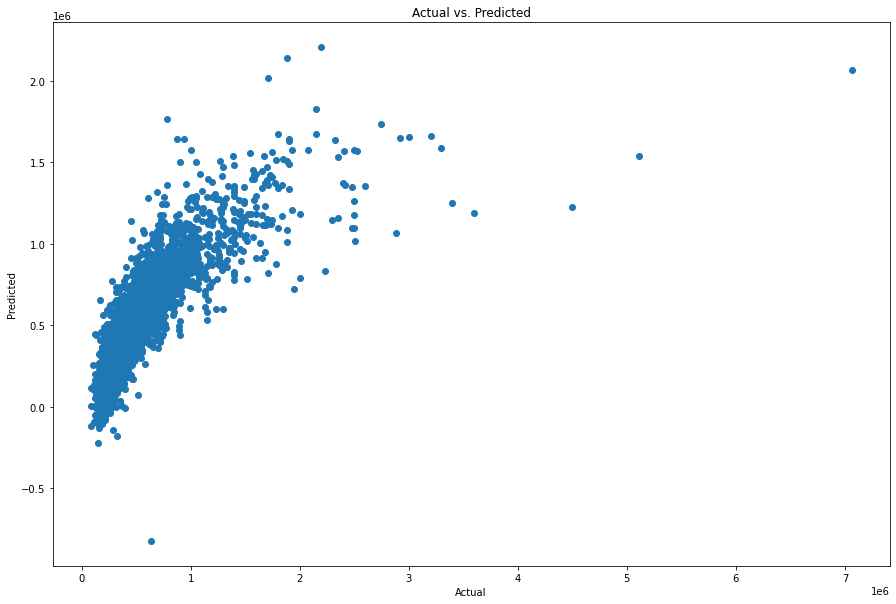

In [51]:
#Create scatter plot to show relationship between actual and predicted data. 
plt.figure(figsize=(15,10))
plt.scatter(y_test_b, y_test_pred_b)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

# Model C

## Feature Engineering

## Remove Outliers

Will remove outliers for certain features in order to make the data more normally distributed and address high skewness and kurtosis from Model's A and B.

In [52]:
df_filtered.bathrooms.mean()

2.1158262721674306

In [53]:
df_filtered.bathrooms.std()

0.7689842966527209

In [54]:
df_filtered.bedrooms.mean()

3.3731999814789093

In [55]:
df_filtered.bedrooms.std()

0.9262988945421479

In [56]:
#Find the upper limit of three standard deviations for 'bathrooms'. 
upper_limit = df_filtered.bathrooms.mean() + 3*df_filtered.bathrooms.std()
upper_limit

4.422779162125593

In [57]:
#Find the upper limit of three standard deviations for 'bedrooms'.
upper_limit_beds = df_filtered.bedrooms.mean() + 3*df_filtered.bedrooms.std()
upper_limit_beds

6.152096665105352

In [58]:
#Find the lower limit of three deviations for 'bathrooms'.
lower_limit = df_filtered.bathrooms.mean() - 3*df_filtered.bathrooms.std()
lower_limit

-0.19112661779073248

In [59]:
#Find the lower limit of three standard deviations for 'bedrooms'.
lower_limit_beds = df_filtered.bedrooms.mean() - 3*df_filtered.bedrooms.std()
lower_limit_beds

0.5943032978524658

In [60]:
#Find the upper limit of three standard deviations for 'price'.
upper_limit_price = df_filtered.price.mean() + 3*df_filtered.price.std()
upper_limit_price

1642400.9938097629

In [61]:
#Find the lower limit of three standard deviations for 'price'.
lower_limit_price = df_filtered.price.mean() - 3*df_filtered.price.std()
lower_limit_price

-561807.8467986039

In [62]:
#Create new dataframe removing the upper and lower limit outliers for 'bathrooms', 'bedrooms', and 'price'.
df_outliers=df_filtered[(df_filtered.bathrooms<upper_limit) & (df_filtered.bathrooms>lower_limit) 
                        & (df_filtered.bedrooms<upper_limit_beds) & (df_filtered.bedrooms>lower_limit_beds)
                       & (df_filtered.price<upper_limit_price) & (df_filtered.price>lower_limit_price)]
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21040 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21040 non-null  float64
 1   bedrooms     21040 non-null  int64  
 2   bathrooms    21040 non-null  float64
 3   sqft_living  21040 non-null  int64  
 4   sqft_lot     21040 non-null  int64  
 5   floors       21040 non-null  float64
 6   condition    21040 non-null  int64  
 7   grade        21040 non-null  int64  
 8   sqft_above   21040 non-null  int64  
 9   yr_built     21040 non-null  int64  
 10  zipcode      21040 non-null  object 
 11  lat          21040 non-null  float64
 12  long         21040 non-null  float64
dtypes: float64(5), int64(7), object(1)
memory usage: 2.2+ MB


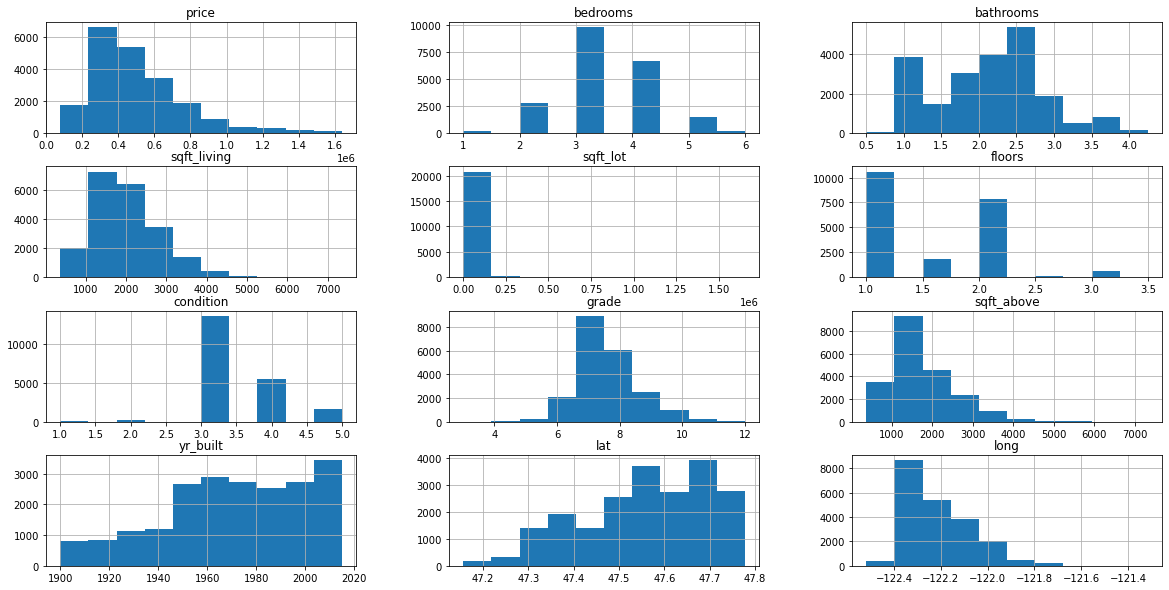

In [63]:
#Check new distributions of the features.
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
df_outliers.hist(ax = ax);

In [64]:
zip_dummies_c = pd.get_dummies(df_outliers['zipcode'], prefix='zip', drop_first=True)

In [65]:
#Update zip dummies to remove the zip codes with high p-values.
updated_zip_c = zip_dummies_c.drop(['zip_98002','zip_98003','zip_98022','zip_98023','zip_98030','zip_98031',
                                'zip_98032','zip_98038','zip_98042','zip_98055','zip_98058','zip_98092',
                                  'zip_98188','zip_98168','zip_98178','zip_98188','zip_98148','zip_98198'], axis=1)
updated_zip_c.head()

,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98024,...,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98155,zip_98166,zip_98177,zip_98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#Create Model C features, which will be scaled in order to be able to compare between eachother more easily.
model_c = pd.DataFrame([])
price_c = df_outliers['price']
bathrooms_c = df_outliers['bathrooms']
scaled_bath_c = (bathrooms_c-np.mean(bathrooms_c))/np.sqrt(np.var(bathrooms_c))
bedrooms_c = df_outliers['bedrooms']
scaled_bed_c = (bedrooms_c-np.mean(bedrooms_c))/np.sqrt(np.var(bedrooms_c))
#Will log transform 'sqft_lot' in order to get a more even distribution.
log_lot_c = np.log(df_outliers['sqft_lot'])
scaled_log_lot_c = (log_lot_c-np.mean(log_lot_c))/np.sqrt(np.var(log_lot_c))
updated_zip_c
sqfta_c = df_outliers['sqft_above']
scaled_sqfta_c = (sqfta_c-np.mean(sqfta_c))/np.sqrt(np.var(sqfta_c))

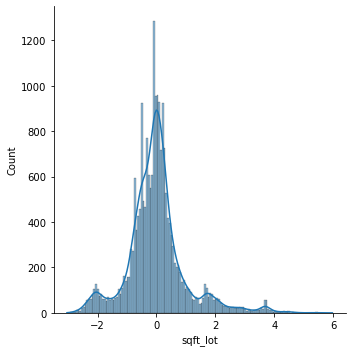

In [67]:
sns.displot(x=scaled_log_lot_c,kind='hist',kde=True);

## Model C Training

In [68]:
model_c = pd.concat([price_c, scaled_bath_c, scaled_log_lot_c, scaled_sqfta_c, updated_zip_c], axis=1)
model_c.head()

,price,bathrooms,sqft_lot,sqft_above,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,...,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98155,zip_98166,zip_98177,zip_98199
0,221900.0,-1.509925,-0.372593,-0.740182,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,0.251155,-0.095442,0.568532,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,180000.0,-1.509925,0.264825,-1.282175,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1.307802,-0.509044,-0.912034,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,-0.101061,0.026804,-0.079215,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
model_c.describe()

,price,bathrooms,sqft_lot,sqft_above,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,...,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98155,zip_98166,zip_98177,zip_98199
count,2.104000e+04,2.104000e+04,2.104000e+04,2.104000e+04,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,...,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000
mean,5.043270e+05,2.161347e-16,-4.754963e-16,1.242774e-16,0.010884,0.007700,0.021816,0.006559,0.013070,0.004705,...,0.019154,0.016778,0.023289,0.012357,0.015684,0.013688,0.020722,0.011835,0.011692,0.014306
std,2.565535e+05,1.000024e+00,1.000024e+00,1.000024e+00,0.103760,0.087411,0.146085,0.080723,0.113579,0.068435,...,0.137069,0.128440,0.150823,0.110478,0.124254,0.116196,0.142457,0.108144,0.107498,0.118752
min,7.800000e+04,-2.214356e+00,-3.035993e+00,-1.810949e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.199500e+05,-8.054929e-01,-5.088209e-01,-7.401823e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.450000e+05,2.511547e-01,-4.820231e-02,-2.642862e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.250000e+05,6.033705e-01,3.145553e-01,5.420933e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.640000e+06,3.068882e+00,5.966313e+00,7.376490e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
#Seperate Model C into training and testing datasets for analysis.
target_c = model_c['price']
features_c = model_c.drop(['price'], axis=1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(features_c,target_c,test_size=0.2,random_state=42)
X_train_c.head()

,bathrooms,sqft_lot,sqft_above,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,...,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98155,zip_98166,zip_98177,zip_98199
13008,0.603371,-0.402634,0.343803,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4152,-0.453277,-0.047464,-0.885595,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20018,0.603371,-0.738531,1.062935,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14003,-1.509925,0.101101,-0.766621,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2513,-1.509925,-0.233435,-1.401149,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
outcome_c = 'y_train_c'
predictors_c = X_train_c
pred_sum_c = '+'.join(predictors_c.columns)
formula_c = outcome_c + '~' + pred_sum_c

In [72]:
data_c = pd.concat([X_train_c,y_train_c], axis=1)
data_c.head()

,bathrooms,sqft_lot,sqft_above,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,...,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98155,zip_98166,zip_98177,zip_98199,price
13008,0.603371,-0.402634,0.343803,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,360000.0
4152,-0.453277,-0.047464,-0.885595,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,222000.0
20018,0.603371,-0.738531,1.062935,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,415000.0
14003,-1.509925,0.101101,-0.766621,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,255000.0
2513,-1.509925,-0.233435,-1.401149,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,179900.0


In [73]:
#Creat Model C OLS model.
model_c_ols = ols(formula=formula_c, data=data_c).fit()
model_c_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              y_train_c   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     946.3
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:38:12   Log-Likelihood:            -2.2160e+05
No. Observations:               16832   AIC:                         4.433e+05
Df Residuals:                   16776   BIC:                         4.437e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.024e+05   1951.983    154.939      0.000    2.99e+05    3.06e+05
bathrooms   4.795e+04   1323.293     36.234      0.000    4.54e+04    5.05e+04
sqft_lot    4.971e+04   1245.807     39.904      0.000    4.73e+04    5.22e+04
sqft_above  1.065e+05   1437.354     74.127      0.000    1.04e+05    1.09e+05
zip_98004   6.543e+05   9578.981     68.303      0.000    6.36e+05    6.73e+05
zip_98005   3.785e+05   1.13e+04     33.538      0.000    3.56e+05    4.01e+05
zip_98006   3.712e+05   6841.469     54.259      0.000    3.58e+05    3.85e+05
zip_98007   2.825e+05   1.23e+04     22.917      0.000    2.58e+05    3.07e+05
zip_98008   2.881e+05   8801.527     32.738      0.000    2.71e+05    3.05e+05
zip_98010   1.032e+04   1.43e+04      0.724      0.469   -1.76e+04    3.83e+04
zip_98011   1.385e+05   1.01e+04     13.755      0.000    1.19e+05    1.58e+05
zip_98014   2.997e+04   1.32e+04      2.264      0.024    4019.751    5.59e+04
zip_98019   3.225e+04   1.04e+04      3.110      0.002    1.19e+04    5.26e+04
zip_98024   8.919e+04   1.83e+04      4.874      0.000    5.33e+04    1.25e+05
zip_98027   2.009e+05   7215.798     27.843      0.000    1.87e+05    2.15e+05
zip_98028   1.396e+05   8614.078     16.204      0.000    1.23e+05    1.56e+05
zip_98029   2.316e+05   8290.689     27.933      0.000    2.15e+05    2.48e+05
zip_98033   3.671e+05   7363.016     49.861      0.000    3.53e+05    3.82e+05
zip_98034   2.003e+05   6496.010     30.836      0.000    1.88e+05    2.13e+05
zip_98039   8.736e+05   3.27e+04     26.699      0.000    8.09e+05    9.38e+05
zip_98040   5.732e+05   9346.056     61.328      0.000    5.55e+05    5.91e+05
zip_98045   4.941e+04   9773.943      5.055      0.000    3.02e+04    6.86e+04
zip_98052   2.663e+05   6229.461     42.740      0.000    2.54e+05    2.78e+05
zip_98053   1.919e+05   7665.764     25.035      0.000    1.77e+05    2.07e+05
zip_98056   1.046e+05   7326.516     14.278      0.000    9.02e+04    1.19e+05
zip_98059   8.971e+04   6801.964     13.189      0.000    7.64e+04    1.03e+05
zip_98065   8.992e+04   8435.187     10.661      0.000    7.34e+04    1.06e+05
zip_98070   9.815e+04   1.34e+04      7.337      0.000    7.19e+04    1.24e+05
zip_98072    1.56e+05   8716.139     17.895      0.000    1.39e+05    1.73e+05
zip_98074    2.18e+05   7156.621     30.461      0.000    2.04e+05    2.32e+05
zip_98075   2.394e+05   8080.671     29.630      0.000    2.24e+05    2.55e+05
zip_98077   1.314e+05   1.05e+04     12.542      0.000    1.11e+05    1.52e+05
zip_98102   5.523e+05   1.45e+04     38.168      0.000    5.24e+05    5.81e+05
zip_98103   3.965e+05   6240.258     63.539      0.000    3.84e+05    4.09e+05
zip_98105   5.346e+05   9956.559     53.697      0.000    5.15e+05    5.54e+05
zip_98106   1.439e+05   7943.538     18.115      0.000    1.28e+05    1.59e+05
zi

## Model C Evaluation

Model C produces a higher R-squared than both models A and B. Also the skew and kurtosis have both significantly decreased indicating more evenly distributed data. There is also one zip code with a high p-value likely due to the presence of an outlier. It also appears that sqft_above contributes more to the home price than does sqft_lot and bathrooms according to the coefficiants. Also looking at the coefficiants we can see that certain zip codes are the most important factor in determing the price of the home.  

In [74]:
model_c_lr = LinearRegression()
model_c_lr.fit(X_train_c,y_train_c)

LinearRegression()

In [75]:
y_train_pred_c = model_c_lr.predict(X_train_c)
y_test_pred_c = model_c_lr.predict(X_test_c)

In [76]:
print('Train Mean Absolute Error:',metrics.mean_absolute_error(y_train_c, y_train_pred_c))
print('Test Mean Absolute Error:',metrics.mean_absolute_error(y_test_c, y_test_pred_c))

Train Mean Absolute Error: 87682.18491113093
Test Mean Absolute Error: 91518.19050425051


In [77]:
print('Train Mean Squared Error:',metrics.mean_squared_error(y_train_c, y_train_pred_c))
print('Test Mean Squared Error:',metrics.mean_squared_error(y_test_c, y_test_pred_c))

Train Mean Squared Error: 15945451448.499136
Test Mean Squared Error: 18263182375.058258


In [78]:
print('Train Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_train_c, y_train_pred_c)))
print('Test Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test_c, y_test_pred_c)))

Train Root Mean Squared Error: 126275.30023127697
Test Root Mean Squared Error: 135141.3422127302


In [79]:
resid_c = y_test_pred_c - y_test_c
resid_c

21069    187437.863327
21517         2.563221
18728    -36515.835068
7977      50536.534485
13857     47809.969836
             ...      
20428   -139783.497771
3124     -47928.073593
17074     83172.054751
4947      41058.526811
3849    -380447.549632
Name: price, Length: 4208, dtype: float64

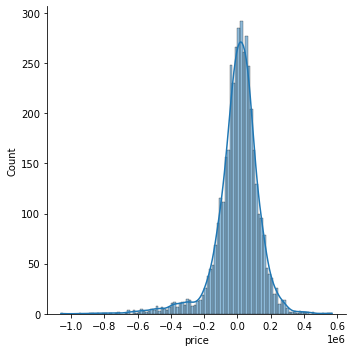

In [80]:
sns.displot(x=resid_c,kind='hist',kde=True);

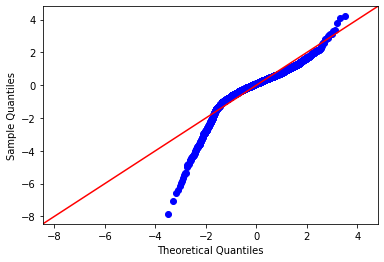

In [81]:
fig = sm.graphics.qqplot(resid_c, dist=stats.norm, line='45',fit=True)

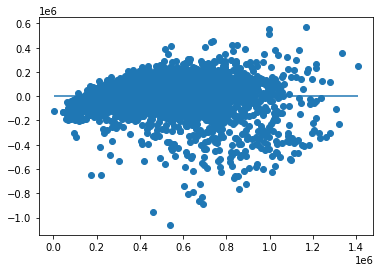

In [82]:
plt.scatter(y_test_pred_c, resid_c)
plt.hlines(y=0, xmin=y_test_pred_c.min(), xmax=y_test_pred_c.max())

Text(0.5, 1.0, 'Actual vs. Predicted')

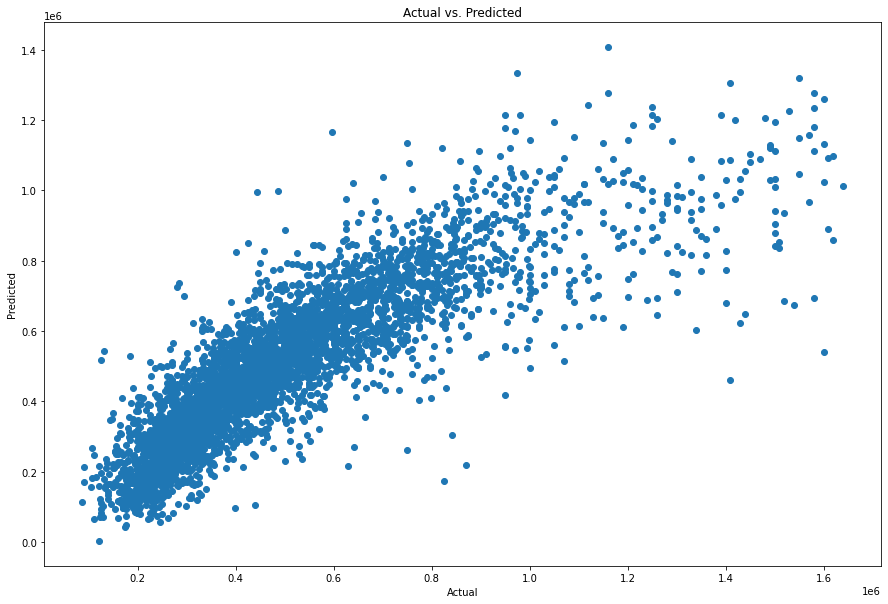

In [83]:
plt.figure(figsize=(15,10))
plt.scatter(y_test_c, y_test_pred_c)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

# Model D

## Feature Engineering

### Remove Outliers

In [84]:
df_filtered.sqft_living.std()

918.1061250800805

In [85]:
upper_limit_sqft = df_filtered.sqft_living.mean() + 3*df_filtered.sqft_living.std()
upper_limit_sqft

4834.640225497222

In [86]:
lower_limit_sqft = df_filtered.sqft_living.mean() - 3*df_filtered.sqft_living.std()
lower_limit_sqft

-673.9965249832612

In [87]:
df_filtered.sqft_lot.std()

41412.636875502074

In [88]:
upper_limit_lot = df_filtered.sqft_lot.mean() + 3*df_filtered.sqft_lot.std()
upper_limit_lot

139337.3193869822

In [89]:
lower_limit_lot = df_filtered.sqft_lot.mean() - 3*df_filtered.sqft_lot.std()
lower_limit_lot

-109138.50186603024

In [90]:
df_outliers_2=df_outliers[(df_filtered.sqft_living<upper_limit_sqft) & (df_filtered.sqft_living>lower_limit_sqft) 
                         & (df_filtered.sqft_lot<upper_limit_lot) & (df_filtered.sqft_lot>lower_limit_lot)]
df_outliers_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        20640 non-null  float64
 1   bedrooms     20640 non-null  int64  
 2   bathrooms    20640 non-null  float64
 3   sqft_living  20640 non-null  int64  
 4   sqft_lot     20640 non-null  int64  
 5   floors       20640 non-null  float64
 6   condition    20640 non-null  int64  
 7   grade        20640 non-null  int64  
 8   sqft_above   20640 non-null  int64  
 9   yr_built     20640 non-null  int64  
 10  zipcode      20640 non-null  object 
 11  lat          20640 non-null  float64
 12  long         20640 non-null  float64
dtypes: float64(5), int64(7), object(1)
memory usage: 2.2+ MB


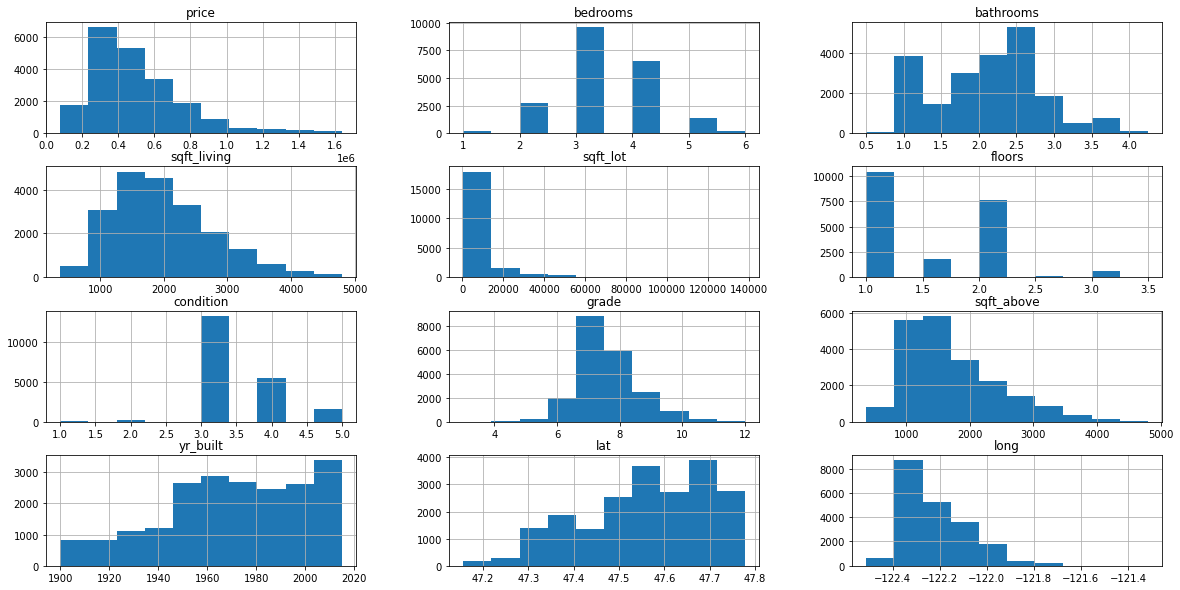

In [91]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
df_outliers_2.hist(ax = ax);

In [92]:
price_d = df_outliers_2['price']
grade_d = df_outliers_2['grade']
scaled_grade_d = (grade_d-np.mean(grade_d))/np.sqrt(np.var(grade_d))
bathrooms_d = df_outliers_2['bathrooms']
scaled_bath_d = (bathrooms_d-np.mean(bathrooms_d))/np.sqrt(np.var(bathrooms_d))
bedrooms_d = df_outliers_2['bedrooms']
scaled_bed_d = (bedrooms_d-np.mean(bedrooms_d))/np.sqrt(np.var(bedrooms_d))
sqft_living_d = df_outliers_2['sqft_living']
scaled_sqftl_d = (sqft_living_d-np.mean(sqft_living_d))/np.sqrt(np.var(sqft_living_d))
zip_dummies_d = pd.get_dummies(df_outliers_2['zipcode'], prefix='zip', drop_first=True)
updated_zip_d = zip_dummies_d.drop(['zip_98002','zip_98003','zip_98022','zip_98023','zip_98030','zip_98031',
                                'zip_98032','zip_98038','zip_98042','zip_98055','zip_98058','zip_98092',
                                  'zip_98188','zip_98168','zip_98178','zip_98188','zip_98148','zip_98198'], axis=1)
log_yr_d = np.log(df_outliers_2['yr_built'])
scaled_yr_d = (log_yr_d-np.mean(log_yr_d))/np.sqrt(np.var(log_yr_d))

## Model D Training

In [93]:
model_d = pd.concat([price_d, scaled_bath_d, scaled_bed_d, scaled_grade_d, 
                     scaled_sqftl_d, updated_zip_d, scaled_yr_d], axis=1)
model_d.head()

,price,bathrooms,bedrooms,grade,sqft_living,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,...,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98155,zip_98166,zip_98177,zip_98199,yr_built
0,221900.0,-1.509859,-0.386749,-0.534134,-1.042263,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.524821
1,538000.0,0.267945,-0.386749,-0.534134,0.734641,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.661930
2,180000.0,-1.509859,-1.549363,-1.460253,-1.566385,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.282418
3,604000.0,1.334628,0.775864,-0.534134,-0.045151,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,-0.183273
4,510000.0,-0.087615,-0.386749,0.391985,-0.403089,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.562055


In [94]:
target_d = model_d['price']
features_d = model_d.drop(['price'], axis=1)

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(features_d,target_d,test_size=0.2,random_state=42)

In [95]:
outcome_d = 'y_train_d'
predictors_d = X_train_d
pred_sum_d = '+'.join(predictors_d.columns)
formula_d = outcome_d + '~' + pred_sum_d

In [96]:
data_d = pd.concat([X_train_d,y_train_d], axis=1)
data_d.head()

,bathrooms,bedrooms,grade,sqft_living,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,...,zip_98133,zip_98136,zip_98144,zip_98146,zip_98155,zip_98166,zip_98177,zip_98199,yr_built,price
14837,0.623506,0.775864,0.391985,0.670723,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-2.224069,865000.0
8642,-1.509859,-0.386749,-0.534134,-1.208448,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.387993,249000.0
18229,-1.509859,-0.386749,-0.534134,-0.684325,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-2.224069,538000.0
14910,0.623506,-0.386749,1.318105,1.067011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.032070,590000.0
2370,-1.509859,-1.549363,-1.460253,-1.195664,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,-0.627626,254000.0


In [97]:
model_d_ols = ols(formula=formula_d, data=data_d).fit()
model_d_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              y_train_d   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     1170.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:38:18   Log-Likelihood:            -2.1552e+05
No. Observations:               16512   AIC:                         4.312e+05
Df Residuals:                   16454   BIC:                         4.316e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.429e+05   1804.492    190.022      0.000    3.39e+05    3.46e+05
bathrooms    1.315e+04   1499.036      8.772      0.000    1.02e+04    1.61e+04
bedrooms    -1.268e+04   1155.525    -10.970      0.000   -1.49e+04   -1.04e+04
grade        7.228e+04   1509.255     47.889      0.000    6.93e+04    7.52e+04
sqft_living  1.083e+05   1736.326     62.361      0.000    1.05e+05    1.12e+05
zip_98004    5.946e+05   8873.263     67.012      0.000    5.77e+05    6.12e+05
zip_98005    3.035e+05   1.02e+04     29.810      0.000    2.84e+05    3.23e+05
zip_98006    2.687e+05   6353.330     42.297      0.000    2.56e+05    2.81e+05
zip_98007    2.311e+05   1.11e+04     20.818      0.000    2.09e+05    2.53e+05
zip_98008    2.352e+05   7864.444     29.906      0.000     2.2e+05    2.51e+05
zip_98010    7.562e+04   1.42e+04      5.310      0.000    4.77e+04    1.04e+05
zip_98011    1.127e+05   9282.769     12.143      0.000    9.45e+04    1.31e+05
zip_98014    1.019e+05   1.33e+04      7.679      0.000    7.59e+04    1.28e+05
zip_98019    7.648e+04   9596.976      7.969      0.000    5.77e+04    9.53e+04
zip_98024    1.313e+05   1.69e+04      7.746      0.000    9.81e+04    1.64e+05
zip_98027    1.686e+05   6686.756     25.215      0.000    1.55e+05    1.82e+05
zip_98028    1.104e+05   7580.195     14.559      0.000    9.55e+04    1.25e+05
zip_98029    1.951e+05   7365.818     26.490      0.000    1.81e+05     2.1e+05
zip_98033    3.309e+05   6539.251     50.607      0.000    3.18e+05    3.44e+05
zip_98034    1.705e+05   5778.908     29.503      0.000    1.59e+05    1.82e+05
zip_98039    7.873e+05   2.93e+04     26.909      0.000     7.3e+05    8.45e+05
zip_98040    4.756e+05   8704.354     54.642      0.000    4.59e+05    4.93e+05
zip_98045    9.575e+04   9107.089     10.514      0.000    7.79e+04    1.14e+05
zip_98052    2.246e+05   5623.490     39.938      0.000    2.14e+05    2.36e+05
zip_98053     2.19e+05   6981.669     31.364      0.000    2.05e+05    2.33e+05
zip_98056    9.661e+04   6640.569     14.549      0.000    8.36e+04     1.1e+05
zip_98059    9.353e+04   6268.062     14.921      0.000    8.12e+04    1.06e+05
zip_98065    1.112e+05   7677.437     14.480      0.000    9.61e+04    1.26e+05
zip_98070    1.459e+05    1.3e+04     11.188      0.000     1.2e+05    1.71e+05
zip_98072    1.557e+05   8134.649     19.141      0.000     1.4e+05    1.72e+05
zip_98074     1.73e+05   6511.934     26.567      0.000     1.6e+05    1.86e+05
zip_98075    2.174e+05   7220.160     30.110      0.000    2.03e+05    2.32e+05
zip_98077    1.458e+05   9963.512     14.634      0.000    1.26e+05    1.65e+05
zip_98102    3.846e+05   1.34e+04     28.708      0.000    3.58e+05    4.11e+05
zip_98103    2.759e+05   5661.875     48.729      0.000    2.65e+05    2.87e+05
zip_98105    3.854e+05   8939.319     43.11

## Model D Evalutation

Model D produces a slighly higher R-squared than Model C at .802. Model D also has significantly lower skew and kurtosis than both Model's A and B while being fairly similar to Model C. All of the p-values in Model D are 0 indicating that all of the features statistically significant. Also looking at the coefficiants it appears that grade and year built contribute more to the home price than bathrooms and bedrooms. Finally square foot living as well as certain zip codes appear to be the most significant factors in contributing to the home price according to the coefficiants, this similar to what was observed in both Model's B and C.

In [98]:
model_d_lr = LinearRegression()
model_d_lr.fit(X_train_d, y_train_d)

LinearRegression()

In [99]:
y_train_pred_d = model_d_lr.predict(X_train_d)
y_test_pred_d = model_d_lr.predict(X_test_d)

In [100]:
print('Train Mean Absolute Error:',metrics.mean_absolute_error(y_train_d, y_train_pred_d))
print('Test Mean Absolute Error:',metrics.mean_absolute_error(y_test_d, y_test_pred_d))

Train Mean Absolute Error: 78335.35096374531
Test Mean Absolute Error: 78281.72847877092


In [101]:
print('Train Mean Squared Error:',metrics.mean_squared_error(y_train_d, y_train_pred_d))
print('Test Mean Squared Error:',metrics.mean_squared_error(y_test_d, y_test_pred_d))

Train Mean Squared Error: 12728599390.46144
Test Mean Squared Error: 12423811108.205994


In [102]:
print('Train Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_train_d, y_train_pred_d)))
print('Test Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test_d, y_test_pred_d)))

Train Root Mean Squared Error: 112821.09461648313
Test Root Mean Squared Error: 111462.15101192868


In [103]:
resid_d = y_test_pred_d - y_test_d
resid_d

20967     13656.761634
3161     109984.406875
16374    109690.262071
21426    -51813.305123
10250    -37284.817820
             ...      
16065    140369.326155
17372   -347979.423863
18906    -14633.995703
2238     -62020.985946
3836     -24781.648437
Name: price, Length: 4128, dtype: float64

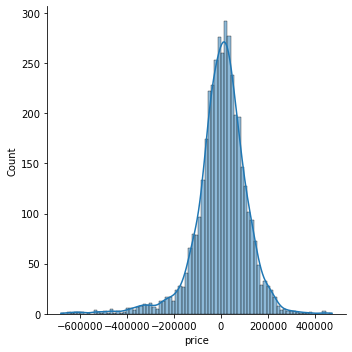

In [104]:
sns.displot(x=resid_d,kind='hist',kde=True);

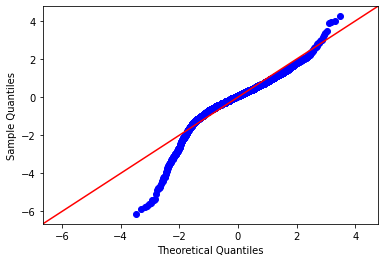

In [105]:
fig = sm.graphics.qqplot(resid_d, dist=stats.norm, line='45',fit=True)

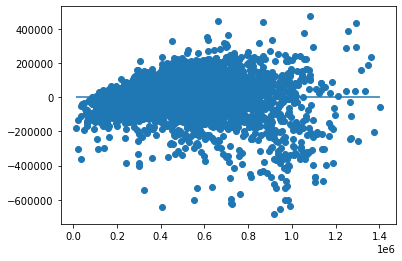

In [106]:
plt.scatter(y_test_pred_d, resid_d)
plt.hlines(y=0, xmin=y_test_pred_d.min(), xmax=y_test_pred_d.max())

Text(0.5, 1.0, 'Actual vs. Predicted')

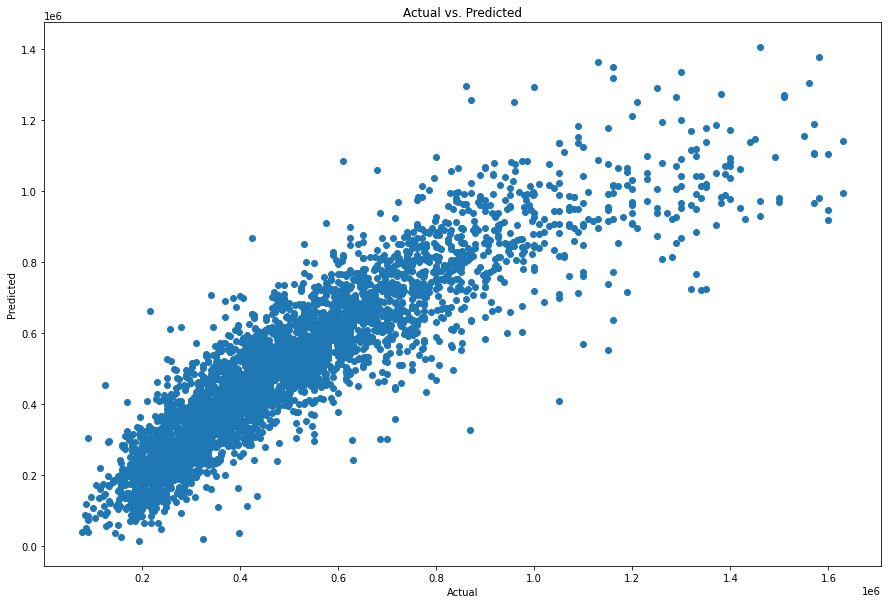

In [107]:
plt.figure(figsize=(15,10))
plt.scatter(y_test_d, y_test_pred_d)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

## Model Comparison

In [108]:
data = {'R-Squared':[.546, .668, .756, .802],
       'Skew':[3.045, 4.983, 1.292, 1.247],
       'Kurtosis':[30.845, 69.1, 8.668, 9.128],
       'MAE (test)':['160,590', '122,502', '91,518', '78,281'],
       'MSE (test)':['60,591,750,008', '46,626,531,192', '18,263,182,375', '12,728,599,390'],
       'RMSE (test)':['246,153', '215,931', '135,141', '111,462']}
model_comparison = pd.DataFrame(data, index=['Model A', 'Model B', 'Model C', 'Model D'])
model_comparison

,R-Squared,Skew,Kurtosis,MAE (test),MSE (test),RMSE (test)
Model A,0.546,3.045,30.845,"160,590","60,591,750,008","246,153"
Model B,0.668,4.983,69.100,"122,502","46,626,531,192","215,931"
Model C,0.756,1.292,8.668,"91,518","18,263,182,375","135,141"
Model D,0.802,1.247,9.128,"78,281","12,728,599,390","111,462"


## Model Selection

In [109]:
final_model = pd.concat([price_d, scaled_bath_d, scaled_bed_d, scaled_grade_d, 
                     scaled_sqftl_d, updated_zip_d, scaled_yr_d], axis=1)

In [110]:
target_e = final_model['price']
features_e = final_model.drop(['price'], axis=1)

In [111]:
outcome_e = 'price'
predictors_e = final_model.drop(['price'], axis=1)
pred_sum_e = '+'.join(predictors_e.columns)
formula_e = outcome_e + '~' + pred_sum_e

In [112]:
final_model_ols = ols(formula=formula_e, data=final_model).fit()
final_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     1468.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:38:21   Log-Likelihood:            -2.6934e+05
No. Observations:               20640   AIC:                         5.388e+05
Df Residuals:                   20582   BIC:                         5.393e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.432e+05   1616.041    212.372      0.000     3.4e+05    3.46e+05
bathrooms    1.341e+04   1330.199     10.080      0.000    1.08e+04     1.6e+04
bedrooms    -1.307e+04   1032.430    -12.663      0.000   -1.51e+04   -1.11e+04
grade        7.247e+04   1342.863     53.965      0.000    6.98e+04    7.51e+04
sqft_living  1.082e+05   1552.591     69.686      0.000    1.05e+05    1.11e+05
zip_98004    5.899e+05   7684.816     76.758      0.000    5.75e+05    6.05e+05
zip_98005    3.019e+05   9138.654     33.040      0.000    2.84e+05     3.2e+05
zip_98006    2.683e+05   5678.885     47.252      0.000    2.57e+05    2.79e+05
zip_98007    2.268e+05   9781.602     23.185      0.000    2.08e+05    2.46e+05
zip_98008     2.34e+05   7021.972     33.329      0.000     2.2e+05    2.48e+05
zip_98010    8.394e+04   1.24e+04      6.772      0.000    5.96e+04    1.08e+05
zip_98011    1.128e+05   8266.781     13.651      0.000    9.66e+04    1.29e+05
zip_98014    9.988e+04   1.16e+04      8.599      0.000    7.71e+04    1.23e+05
zip_98019    7.712e+04   8821.396      8.742      0.000    5.98e+04    9.44e+04
zip_98024    1.343e+05   1.54e+04      8.712      0.000    1.04e+05    1.65e+05
zip_98027    1.665e+05   5967.398     27.900      0.000    1.55e+05    1.78e+05
zip_98028    1.099e+05   6891.455     15.951      0.000    9.64e+04    1.23e+05
zip_98029    1.947e+05   6624.152     29.393      0.000    1.82e+05    2.08e+05
zip_98033    3.346e+05   5813.386     57.557      0.000    3.23e+05    3.46e+05
zip_98034    1.704e+05   5141.882     33.132      0.000     1.6e+05     1.8e+05
zip_98039    7.873e+05   2.66e+04     29.572      0.000    7.35e+05     8.4e+05
zip_98040    4.749e+05   7634.810     62.207      0.000     4.6e+05     4.9e+05
zip_98045    9.525e+04   8159.086     11.674      0.000    7.93e+04    1.11e+05
zip_98052    2.256e+05   5038.720     44.783      0.000    2.16e+05    2.36e+05
zip_98053    2.179e+05   6177.832     35.267      0.000    2.06e+05     2.3e+05
zip_98056    9.214e+04   5837.395     15.784      0.000    8.07e+04    1.04e+05
zip_98059    9.425e+04   5539.713     17.014      0.000    8.34e+04    1.05e+05
zip_98065     1.13e+05   6824.802     16.562      0.000    9.97e+04    1.26e+05
zip_98070    1.614e+05   1.18e+04     13.657      0.000    1.38e+05    1.85e+05
zip_98072    1.535e+05   7145.752     21.478      0.000    1.39e+05    1.67e+05
zip_98074    1.788e+05   5806.361     30.789      0.000    1.67e+05     1.9e+05
zip_98075    2.144e+05   6444.497     33.267      0.000    2.02e+05    2.27e+05
zip_98077    1.497e+05   8779.575     17.051      0.000    1.32e+05    1.67e+05
zip_98102    3.749e+05   1.17e+04     31.969      0.000    3.52e+05    3.98e+05
zip_98103    2.732e+05   5017.340     54.447      0.000    2.63e+05    2.83e+05
zip_98105    3.814e+05   8132.191     46.89

## Conclusions/Summary

Overall it appears that both Zip Codes and Square foot living/Square foot above tend to be the most important factors in determining the actual price of homes. In models B, C, and D these two features produce the highest coeffiecients indicating that they have the stongest relationship with the dependent variable of price. This finding remains true as the models become more accurate and the data becomes more normally distributed accross different models. One interestering finding is that in model A we observed that Square foot living appeared to be the lowest coeffiecient, however this is likely due to the fact that the features were not scaled in this particular model, whereas in models B, C, and D all features were scaled before running the models.  

Text(0.5, 1.0, 'Actual vs. Predicted')

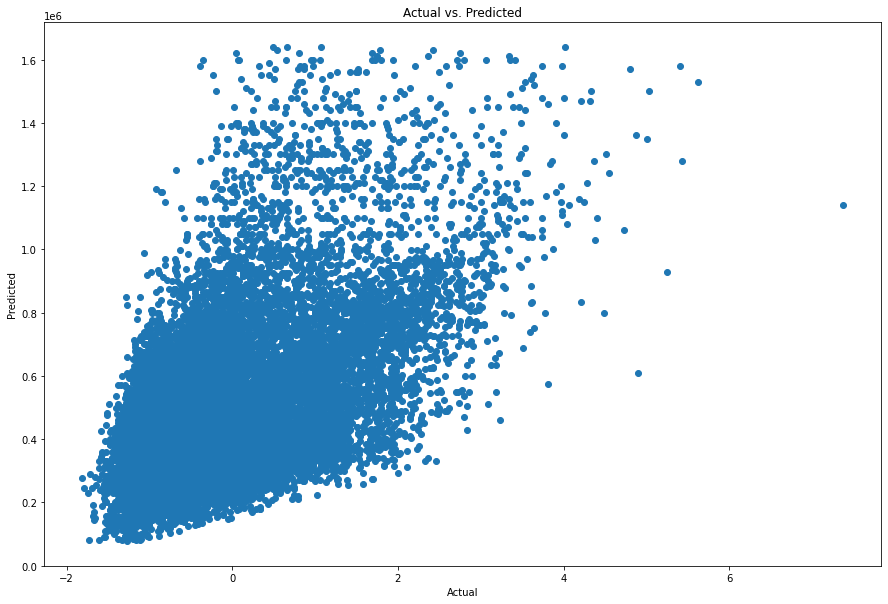

In [113]:
plt.figure(figsize=(15,10))
plt.scatter(X_train_c['sqft_above'], y_train_c)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [114]:
y_train_c

13008    360000.0
4152     222000.0
20018    415000.0
14003    255000.0
2513     179900.0
           ...   
11550    335000.0
12246    365000.0
5525     260000.0
877      229000.0
16188    185000.0
Name: price, Length: 16832, dtype: float64

In [115]:
X_train_d.columns

Index(['bathrooms', 'bedrooms', 'grade', 'sqft_living', 'zip_98004',
       'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010',
       'zip_98011', 'zip_98014', 'zip_98019', 'zip_98024', 'zip_98027',
       'zip_98028', 'zip_98029', 'zip_98033', 'zip_98034', 'zip_98039',
       'zip_98040', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98056',
       'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074',
       'zip_98075', 'zip_98077', 'zip_98102', 'zip_98103', 'zip_98105',
       'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112',
       'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119',
       'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133', 'zip_98136',
       'zip_98144', 'zip_98146', 'zip_98155', 'zip_98166', 'zip_98177',
       'zip_98199', 'yr_built'],
      dtype='object')

In [116]:
model_d.head()

,price,bathrooms,bedrooms,grade,sqft_living,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,...,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98155,zip_98166,zip_98177,zip_98199,yr_built
0,221900.0,-1.509859,-0.386749,-0.534134,-1.042263,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.524821
1,538000.0,0.267945,-0.386749,-0.534134,0.734641,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.661930
2,180000.0,-1.509859,-1.549363,-1.460253,-1.566385,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.282418
3,604000.0,1.334628,0.775864,-0.534134,-0.045151,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,-0.183273
4,510000.0,-0.087615,-0.386749,0.391985,-0.403089,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.562055


In [117]:
plt.figure(figsize=(15,10))

sns.regplot(model_d['bathrooms'], model_d['price'].mean().groupby(model_d['bathrooms'])
plt.xlabel('Bathrooms')
plt.ylabel('Home Price')
plt.title('Bathrooms vs. Price')

SyntaxError: invalid syntax (<ipython-input-117-5111e67d447d>, line 4)